# Predictive Analysis of #BBNaija Tweets

### COURSE TITLE : PYTHON FOR DATA SCIENCE
### COURSE CODE : CSCI 5015


### TEAM MEMBERS:

* MAKANJUOLA OGUNLEYE
* MIRACLE DICKSON

####  COURSE INSTRUCTOR: DR JOHN NICHOLSON (ASSOCIATE PROFESSOR)

#### INTRODUCTION

Python programming language has become a mainstream language and its applications cuts across several industries including, Information Technology, Finance, Government, Market research and many others. In this research work, we would examine the application of Python in discovering information from text documents. 

#### MOTIVATION

Our motivation is gotten from a Reality TV show competition in Nigeria called Big Brother Nigeria. This show has gathered public attraction and has generated a lot of controversies among Nigerians. Perhaps one thing that makes this show popular is its eviction system, it requires the public to vote through Text message or an online voting platform. Each contestant with the lowest vote during a voting period would be evicted. The interesting thing is that most Nigerians now take to twitter to share their opinions and perception about their favorite contestant. Thus, tons of thousands of tweets are added daily mostly from Nigerians about this reality show. We want to extract this data from twitter, analyze them and check for interesting information about them.

#### DATA SET AND DATA COLLECTION:

We took advantage of the fact that the show is currently ongoing, as a result we were able to gather tweets about the show using the hashtag #bbnaija. We connected to twitter using twitter streaming API and we were able to gather 580,000 tweets.
The good thing is that twitter has a feature that allows developers to download streams of tweets as they are being posted into a database. This features granted us access to twitter using twitter streaming API to collect the tweets.

#### DATA PROCESSING:

After extracting the raw file from twitter, we performed data cleaning on the specific parameters needed for our analysis like; tweets made within the last few weeks, the locations the tweets came from, dates each tweet was made and username of the tweeters. Hence we wrote python codes to perform our analysis

#### OBJECTIVES:

We have been able to answer the following research questions at the end of the project:
+ How are tweeters distributed by location?

+ Who are the top contestant by popularity on twitter?

+ Number of tweets that contains each contestant?

+ Words with highest correlation with each contestant and generating N-grams?

+ Who are the Top tweeters and their location? 

+ What are the sentiments around each contestant? 




### Needed Modules

The following modules are needed. 
+ *matplotlib* and *seaborn* and *wordcloud* for creating charts
+ *pandas* and *numpy* for operating with Dataframes and Arrays
+ *re* for Regular Expressions
+ *textblob* and *nltk* for Sentiment analysis and Natural Language Processing


In [25]:
%matplotlib inline
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from operator import itemgetter
from wordcloud import WordCloud
from textblob import TextBlob
from pylab import figure, axes, pie, title, show

### Reading in Data

The extracted Tweets from twitter were stored in a Json file. Each tweet's Json file contains information about the tweet, such as creation date, tweet text, location, and many more even retweeters information are also stored in each tweet Json file. We read in the entire Json file and we extracted three informations we need to answer our research questions. **tweet text**,  **tweet location** and  **tweet date**  

In [79]:
import json
tweetText = []
location = []
date = []
with open('pythonbbnaija.json') as dataIn:
    for row in dataIn:
        try:
            tweet = json.loads(row)
            tweetText.append(tweet['text'])
            location.append(tweet['user']['location'])
            date.append(tweet['created_at'])
        except:
            continue

### Creating a DataFrame

In order to utilize the power of the **pandas data frame** structure, we created a Data Frame of Tweet text( which is the most important component of our analysis), tweet location and tweet date.

In [80]:
import pandas as pd
twtData = pd.DataFrame({
    'Tweet' : tweetText,
    'location' : location,
    'date' : date,
})

### Needed Functions

Here we defined Functions that would be needed throughout our analysis.

+ **emoji_pattern**  - creates a regular expression pattern for emojis to be later removed during the cleaning process
+ **rePart** : creates a dictionary of some regular expression pattern that would be used in replacing some words during the cleaning process
+ **reExpr** : creates a pattern which would be used in counting word occurences as part of the *CountWrd* function
+ **RemoveStopWord**: This function recieves a string, sentence or a tweet, splits it and returns a new with no stopword. Stopwords are prepositions and conjuctions that have little or no usefulness in Natural Language Processing or Text Mining.
+ **RemoveUrl** : Removes URL from tweets. Returns a string with no Url
+ **ReplacePattern**: Replace similar patterns of words with one single word. Somewhat related to stemming.
+ **CountWrd** : Recieves two arguments. A data; could be a list, array or series, and a search pattern. counts the occurences of that pattern in the data. Then returns the count.
+ **Ngram** : Recieves two arguments. A data; could be a list, array or series, and a key word. Creates and returns a list of bi-gram of words around the keyword.
+ **GetTweetSentiment**: Recieves a string, here a tweet. the module **textBlob** is used to get sentiment polarity. if polarity is less that 0; it returns a negative sentiment, if equal to 0: it returns a neutral sentiment, if greater than zero: it returns a positve sentiment. 
+ **PlotWordCloud**: This function recieves a list, concatenates it to a text. Then returns a word cloud plot of the Text.

In [81]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

rePart = {
    'cee-c' : r'cee',
    'miracle': r'mira'
}
reExpr = {
    'cee-c' : re.compile(r'cee'),
    'miracle': re.compile(r'mira'),
    'nina': re.compile(r'nina'),
    'lolu': re.compile(r'lolu'),
    'alex': re.compile(r'alex'),
    'anto': re.compile(r'anto'),
    'khloe':re.compile(r'khloe'),
    'tobi' :re.compile(r'tobi')
}

def RemoveStopWord(data):
    word = ''
    for wrd in data.split():
        if wrd not in stopwrd:
            word = word + ' ' + wrd
    return word
def RemoveUrl(wordseries):
    word = ''
    for wrd in wordseries.split():
        if wrd[:4] != 'http':
            word = word + wrd + ' '
    return word

def ReplacePattern(data, part):
    word = ''
    dataSplit = data.split()
    for i in range(len(dataSplit)):
        m = re.search(rePart[part], dataSplit[i])
        if m:
            dataSplit[i] = part 
    for wrd in dataSplit:
        word = word + wrd + ' '
    return word
def CountWrd(data, pattern):
    cnt = 0
    for word in data:
        m = reExpr[pattern].search(word)
        if m:
            cnt+= 1
    return cnt

def Ngram(data, keyword):
    gramLst = []
    for i in range(len(data)):
        if data[i] == keyword :
            if data[i-1] == data[i] or data[i] == data[i+1]:
                continue
            elif data[i-1] == data[i+1]:
                needOnly = data[i-1] + '-' + data[i]
                gramLst.append(needOnly)
            else:
                needLeft = data[i-1] + '-' + data[i]
                needRight = data[i] + '-' + data[i + 1]
                gramLst.append(needLeft)
                gramLst.append(needRight)
    return gramLst

def GetTweetSentiment(tweet):
        analysis = TextBlob(tweet)
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

def PlotWordCloud(AList):
    text = ' '.join(AList)
    wc = WordCloud(width=800, height=600, margin=5,
              stopwords=[], prefer_horizontal = 1.5).generate(text)

    n = plt.figure(figsize=(10,14), dpi=100)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

### Data Pre-processing

This is our **Data Cleaning** Stage. Here We:
* Transformed tweets text to lower
* Removed emoji
* Removed Stop words
* Removed Url Links

We observed some contestants were pronounced in different ways, we try to conserve data by stemming this names as one. Therefore we:

* Replaced Patterns

In text analysis it is sometimes useful to break text into word tokens, this word tokens can be used to calculate frequencies and perform quantitative analysis. We splitted the whole tweet document into word tokens

In [82]:
stopwrd = set(stopwords.words('english'))

twtData['Tweet'] = twtData['Tweet'].apply(lambda x: x.lower())
twtData['Tweet'] = twtData['Tweet'].apply(lambda x: emoji_pattern.sub(r'', x))
twtData['Tweet'] = twtData['Tweet'].apply(lambda x: removeStopWord(x)) 
twtData['Tweet'] = twtData['Tweet'].apply(lambda x: removeUrl(x))

twtData['Tweet'] = twtData['Tweet'].apply(lambda x: replacePattern(x, 'cee-c'))
twtData['Tweet'] = twtData['Tweet'].apply(lambda x: replacePattern(x, 'miracle'))

wordlst = [wrd for tw in twtData['Tweet'] for wrd in tw.split()]
wordseries = pd.Series(wordlst)

### Question 1 - How are tweeters distributed by location?

Using the location column in our Data frame, we were able to answer this question, the location series was converted to lower case. replicate locations were stemmed as one. And then *sns countplot* was used to plot the distribution of tweeters by location. 

In [83]:
location = twtData['location'].str.lower().tolist()
                               
for i in range(len(location)):
    if location[i] != None:
        m = re.match(r'lagos|lasgidi', location[i])
        g = re.match(r'pretoria, south africa|johannesburg, south africa|durban, south africa', location[i])
        n = re.match(r'abuja|federal capital territory, nig', location[i])
        j = re.match(r'england, united kingdom|united kingdom', location[i])
        k = re.match(r', nigeria|nigeria.|nigeria', location[i])
        u = re.match(r'nairobi, kenya|kenya', location[i])
        if m:
            location[i] = 'lagos'
        if n:
            location[i] = 'abuja'
        if k:
            location[i] = 'nigeria'
        if g:
            location[i] = 'south africa'
        if j:
            location[i] = 'united kingdom'
        if u:
            location[i] = 'kenya'


In [85]:
locat = [i for i in location if i != None ]
lstDict= {}
for i in locat:
    lstDict[i] = lstDict.get(i, 0) + 1
sortedlist = sorted(lstDict.items(), key=itemgetter(1), reverse = True)
sortedlist 

lst2 = [j[0] for j in sortedlist[0:20][::-1]]
lst3 = [item for item in locat if item in lst2]


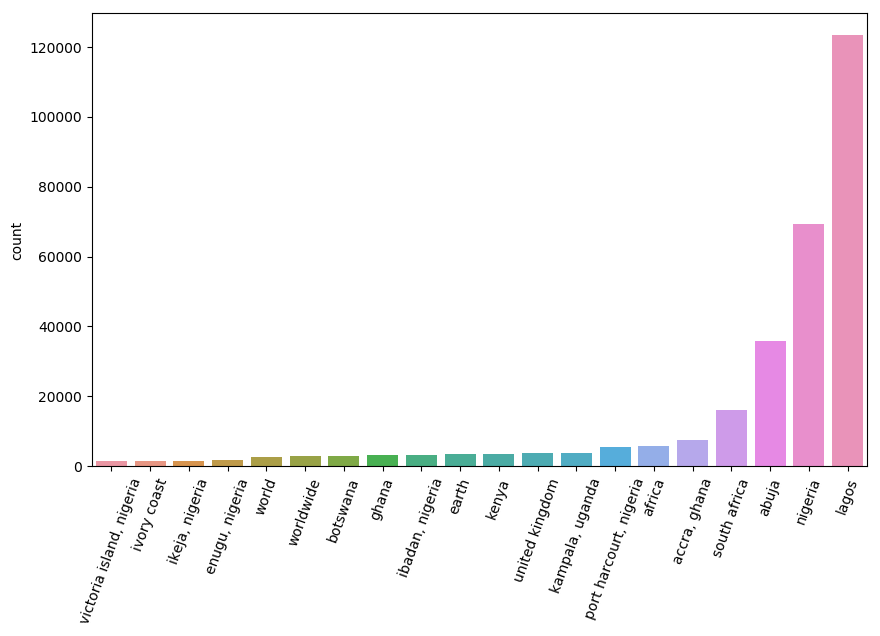

In [86]:
plt.figure(figsize=(10,6), dpi = 100)
ax = sns.countplot(x = lst3, order = lst2)
ax.set_xticklabels(lst2, rotation=70)
plt.show()

#### RESULT 1: How are tweeters distributed by location?

This graph tells us that Lagos has highest contribution on BBnaija based on the top 20 countries we output. Also, we can tell that other African countries like kenya, uganda, ghana, and ivory coast have good online engagement for BBnaija. One of the observations gotten from the data is that most twitter users leave their locations off. We got a count for such users and categorized them as “NONE”, but we had to filter out that from the graph since it contains no useful information for this analysis.


### Question 2 - Who are the top contestant by popularity on twitter?



We created a list of contestants. This list was used to generate counts for each contestant using the **countWrd** function we defined above. This counts were saved in a list using list comprehension. Finnaly we plotted a matplotlib bar chart of Contestant versus name counts.



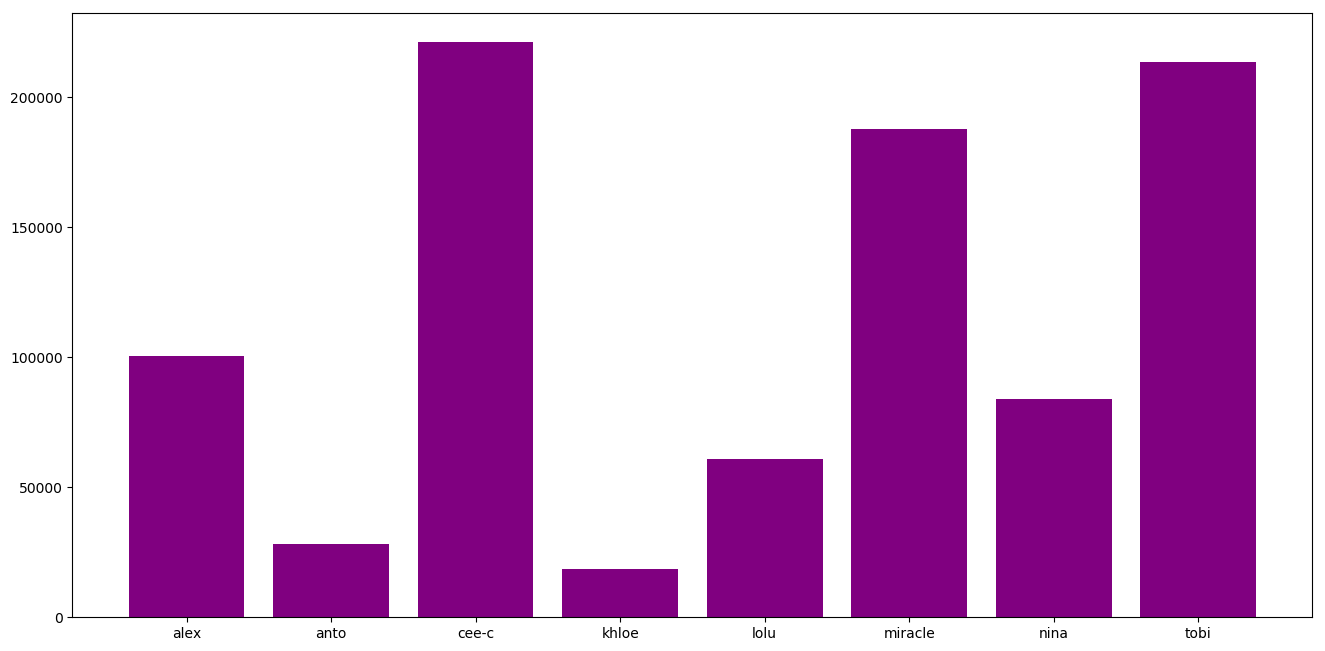

,Names,Counts
0,cee-c,221281
1,tobi,213481
2,miracle,187914
3,alex,100532
4,nina,83951
5,lolu,60984
6,anto,28053
7,khloe,18737


In [87]:
keys = ['miracle', 'cee-c','alex', 'nina', 'lolu',  'khloe', 'tobi', 'anto' ]
cnt = [countWrd(wordlst,x) for x in keys]
cntDict2 = dict(zip(keys,cnt))
sortedlist = sorted(cntDict2.items(), key=itemgetter(1), reverse = True)


plt.figure(figsize=(16,8), dpi = 100)
ax = plt.bar(cntDict2.keys(), cntDict2.values(), color = 'purple')
plt.show()

pd.DataFrame(sortedlist, columns = ['Names','Counts'])


#### RESULT 2: Who are the top contestant by popularity on twitter?

We can tell from this graph that contestants mostly talked about are Cee-c, followed by Miracle and then Tobi. 


### Question 3 - Number of tweets that contains each contestant?

We created a list of contestants. This list was used to generate counts for each contestant using the **countWrd** function we defined above. we passed the series of our tweet  text into the countWrd function. This counts unique appearances of contestants name in a tweet. This counts were saved in a list using list comprehension. Finnaly we plotted a matplotlib bar chart of Contestant versus The number of tweets that contains each contestant

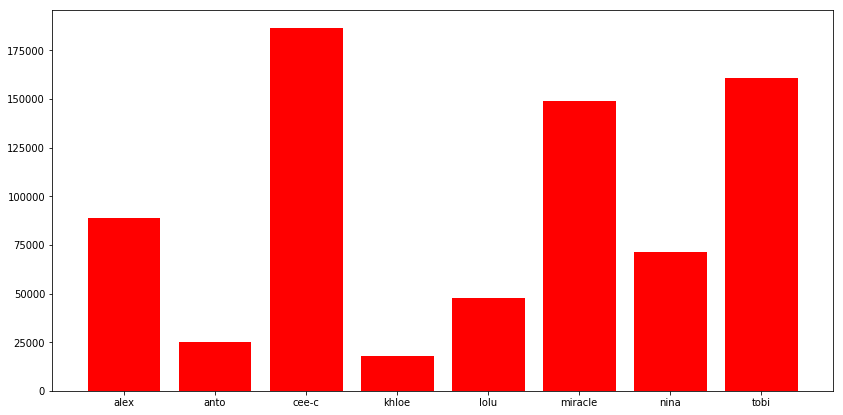

,Names,Counts
0,cee-c,186289
1,tobi,160997
2,miracle,149117
3,alex,89024
4,nina,71315
5,lolu,47635
6,anto,25197
7,khloe,17850


In [88]:
keys = ['miracle', 'cee-c','alex', 'nina', 'lolu',  'khloe', 'tobi', 'anto' ]
cnt = [countWrd(twtData['Tweet'],x) for x in keys]

cntDict1 = dict(zip(keys,cnt))
sortedlist = sorted(cntDict1.items(), key=itemgetter(1), reverse = True)

plt.figure(figsize=(14,7))
ax = plt.bar(keys, cnt, color = 'red')
plt.show()

pd.DataFrame(sortedlist, columns = ['Names','Counts'])


#### RESULT 3: Number of tweets that contains each contestant?

We can tell from this graph that for every tweet made by twitter users, Cee-ce appears most, followed by Mira and then Tobi. The difference between this result and the previous one is that we counted each tweet that contains each contestant regardless the number of times the contestant was mentioned per tweet.


### Question 4 - Bigram of word around contestant

#### RESULT 4: Words with highest correlation with each contestant and generating bi-grams?

In text mining, an n-gram is a phrase or combination of words that may take on meaning that is different from, or greater than the meaning of each word individually. A word token is a unigram. A bi-gram is a combination or phrase of two words

Here we created a bigram on words around each contestant as posted by twitter users to see words that are associated with them the most. The N-gram Function was utilized here

So basically, an n-gram can give us an attribute of a person. For example, words around miracle reveals he is a people’s person. As you can see on the Word Cloud; In text mining, a word cloud is a very powerful tool for data visualization. We have created a commonality word cloud. Examples of words that around him that show he seems to be a people person are ‘support miracle’, ‘voting miracle’, ‘like miracle’, ‘miracle fan’ and so on.

Words around Cee-c reveals she might be an active person. As you can see on the word cloud; ‘cee-c talked’, ‘cee-c can’t’, ‘cee-c fight’, ‘cee-c crashed’ and so on.

Words around Nina reveals that she might be a Talking type of person. As can be seen on the word cloud; ‘telling nina’, ‘nina said’, ‘nina talk’ e.t.c


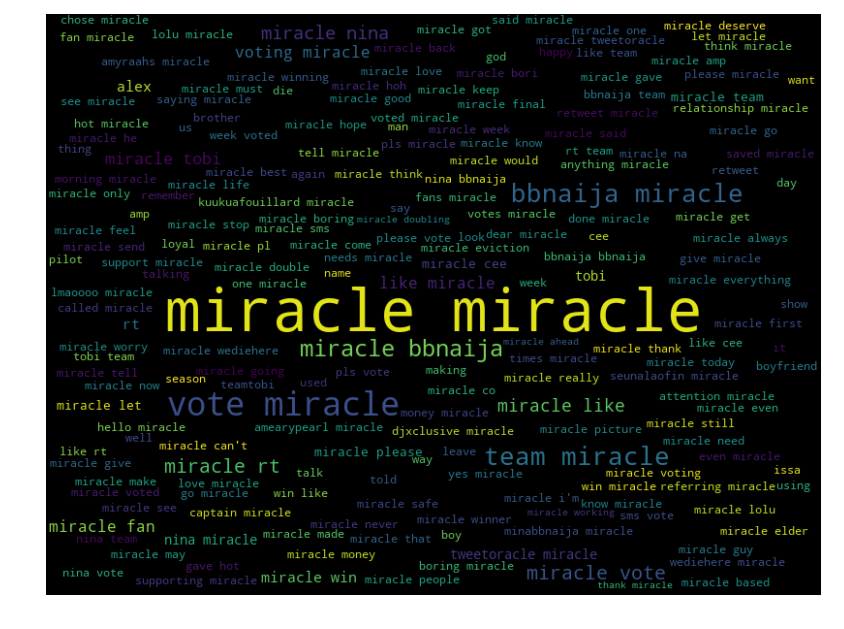

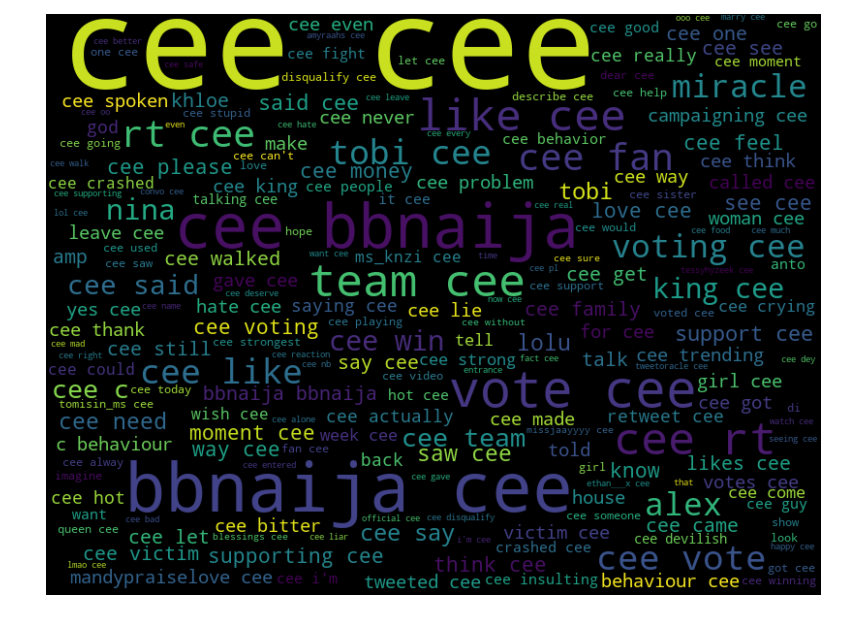

In [89]:
contNames = ['miracle', 'cee-c','alex', 'nina', 'lolu',  'khloe', 'tobi', 'anto' ]
interestNgram = [Ngram(wordlst, x) for x in contNames]
    
PlotWordCloud(interestNgram[0])
PlotWordCloud(interestNgram[1])

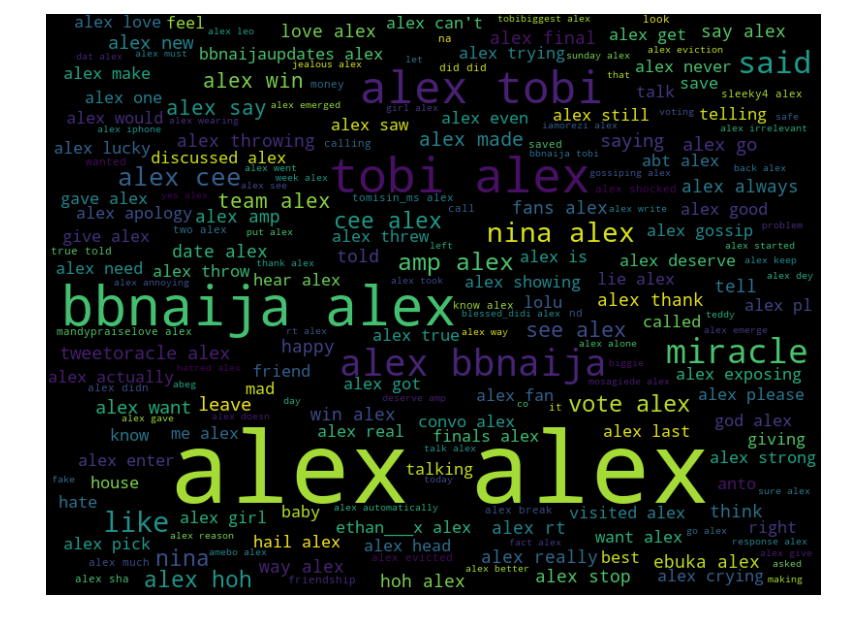

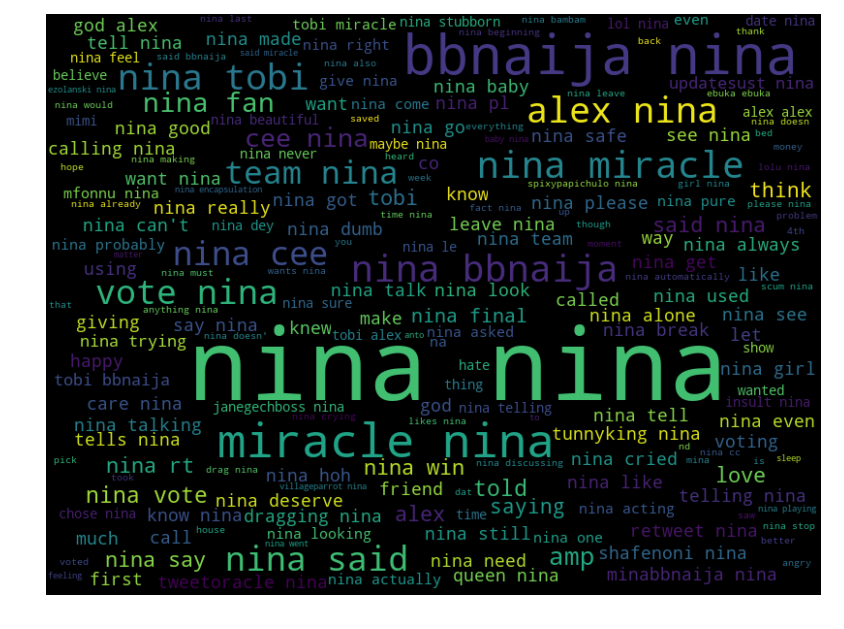

In [90]:
PlotWordCloud(interestNgram[2])
PlotWordCloud(interestNgram[3])

In [91]:
TweetsPerDay = []
for i in range(8,17):
    data = twtData.loc[twtData['date'].str.lower().apply(lambda x: int(x[8:10]) == i)]
    text = ' '.join(data['Tweet'])
    TweetsPerDay.append(text)


### Question 5 - Most Frequent UserNames
using subset and **apply lambda** function in panda series we extracted a subset of the list of word tokens such that the first charcter in the word is an '@'. These are the user names that occured throughout the tweets. The top 15 userNames were then plotted using sns count plot.

    Counts           Username
0    14435      @tweetoracle:
1     9780          @bbnaija:
2     8613           @bbnaija
3     6639  @kuukuafouillard:
4     5285  @mandypraiselove:
5     4769         @amyraahs:
6     4681       @namrata956:
7     3639        @mosagiede:
8     3471  @neerajdas198019:
9     3419      @bbnaija2018:
10    3276       @satsahib17:
11    3247   @kabirisgod0007:
12    2937      @badmanteddya
13    2810          @omoissy:
14    2727         @eve_umeh:
15    2474      @minabbnaija:
16    2428      @tobibiggest:
17    2409        @femibakre:
18    2388       @pepsi_naija
19    2334   @bbnaijaupdates:


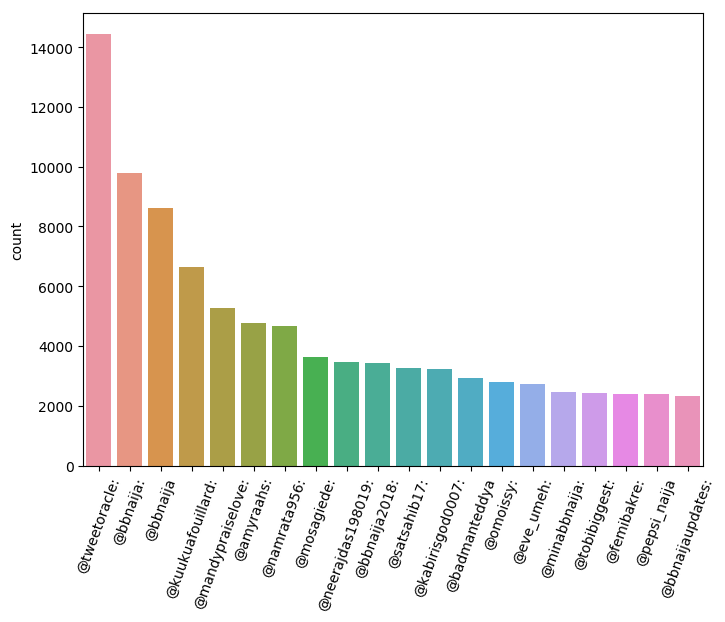

In [92]:
wordat = wordseries[wordseries.apply(lambda x: x[0] == '@')]

topUser = wordat.value_counts()[:20]
topUserDf = pd.DataFrame({
    'Username': topUser.index,
    'Counts' : topUser.values})
print(topUserDf)

needLst = [x for x in wordat if x in topUser.index ]

plt.figure(figsize=(8,6), dpi=100)
ax = sns.countplot(x = needLst, order = topUser.index)
ax.set_xticklabels(topUser.index, rotation=70)
plt.show()

#### RESULT 5:  Who are the Top tweeters and their location? 

We can infer from our research analysis that @tweetoracle is the highest poster as regards BBnaija followed by @bbnaija:, @bbnaija, @kuukuafouillard and so on. Some said @tweetoracle is the most influential social media personality, well maybe that is true!

### Question 6 - Sentiment Analysis

#### RESULT 6: What are the sentiments around each contestant? 

Sentiment Analysis is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially to determine whether the writer's attitude towards a particular topic, product, etc., is positive, negative, or neutral.

In this research we computationally categorize every tweet around a contestant into either of positive, negative or neutral sentiments. This helps us determine further those contestants who have little or more love from fans.


The **GetTweetSentiment** function was applied the tweet column. This fucntions returns a sentiment analysis of a sentence or text passed to it. It returns either a positive, neutral or negative sentiment.This function was applied to each element in the tweet column, using the The *apply and lambda operation*. A new column was then created in the dataframe that contains the corresponding sentiment for each tweet. 

In [58]:
twtData['Sentiment'] = twtData['Tweet'].apply(lambda x: get_tweet_sentiment(x))


### Question 6a - sentiment analysis on Entire collections of tweets

Here we plot a countplot of the distribution of Sentiments through out the entire file

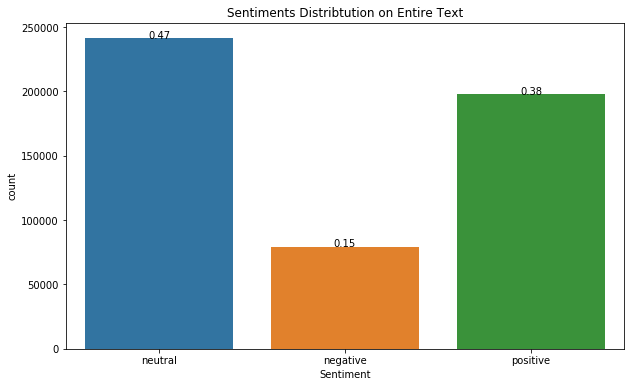

In [64]:
plt.figure(figsize=(10,6))

ax = sns.countplot(twtData.Sentiment)
ax.set_title('Sentiments Distribtution on Entire Text')
total = float(len(twtData))


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height/total), ha="center") 

plt.show()

### Question 6b - Sentiments around contestants

Here we plotted sentiments around contestants.

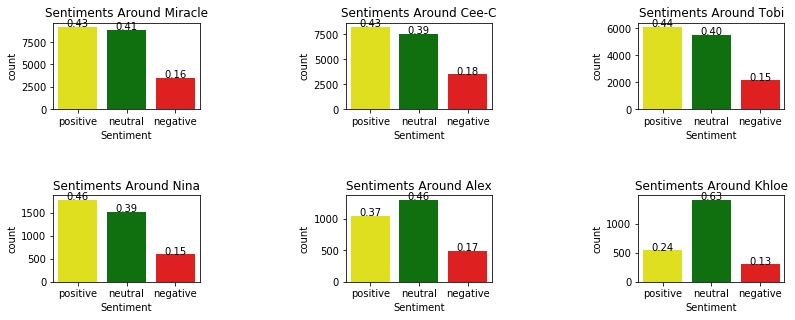

In [68]:
contExpr = [r'mira', r'cee', r'alex', r'nina', r'lolu',  r'khloe', r'tobi', r'anto' ]
contId = [0,1,2,3,4,5,6,7]
contDict = dict(zip(contId,contExpr))
ContestantFrame = [twtData.loc[twtData['Tweet'].apply(lambda x: bool(re.search(contDict[item], x)))] for item in contId] 

def subPlot(data, m, n, title):
    orD = ['positive', 'neutral', 'negative']
    pt = sns.countplot(x="Sentiment", data=data, palette= ['yellow','green','red'], 
                       order = orD , ax=ax[m][n]).set_title(title)
    
    total = float(len(data))
    for p in ax[m][n].patches:
        height = p.get_height()
        ax[m][n].text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height/total),  ha="center") 
        plt.subplots_adjust(left  = 0.008, right = 1.7, bottom = 0.1, top = 1.0, wspace = 1.0,hspace = 1.0)
    return pt

fig, ax =plt.subplots(2,3)
subPlot(ContestantFrame[0], 0, 0, 'Sentiments Around Miracle')
subPlot(ContestantFrame[1], 0, 1,'Sentiments Around Cee-C')
subPlot(ContestantFrame[6], 0, 2, 'Sentiments Around Tobi')
subPlot(ContestantFrame[3], 1, 0,'Sentiments Around Nina')
subPlot(ContestantFrame[2], 1, 1,'Sentiments Around Alex')
subPlot(ContestantFrame[5], 1, 2,'Sentiments Around Khloe')

plt.show()

Tobi seems to be the one with the highest positive, whereas Cee-c even with a high positive has the highest Negative. However, Miracle has a high positive, low negative and has more tweets compared to Tobi. 
As statisticians who do not exactly conclude on a hypothesis, but we can infer and make predictions. We feel Miracle cee-c and Tobi have the top shots in the game

### Question 7 - word cloud of entire Text document.

We made use of our already defined function for wordclouds to plot a word cloud on the entire document.

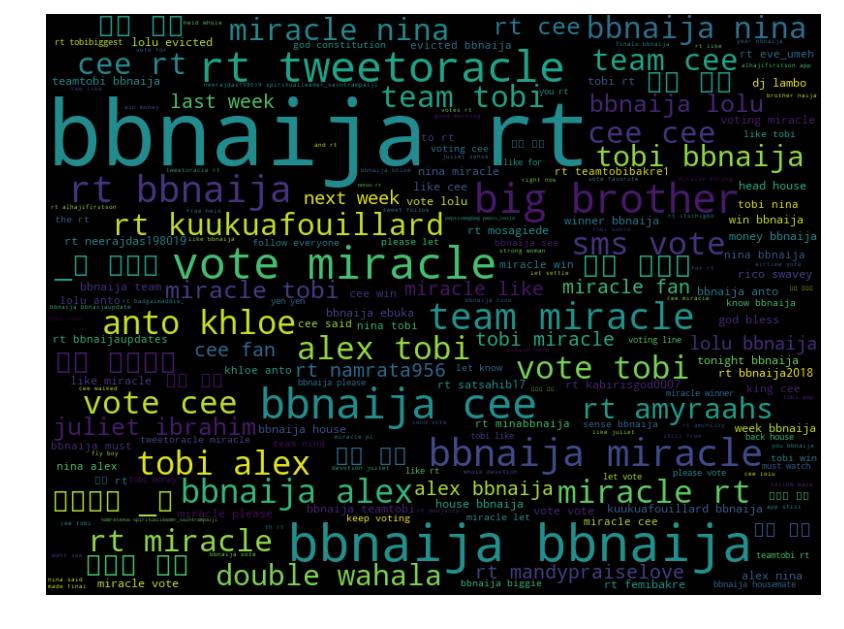

In [74]:
PlotWordCloud(wordlst)

*bbnaija*, *the contestants names*, *the word Vote*, *team*, *sms*, are the prevailing words in the tweets

In [75]:
TweetsPerDay = []
for i in range(8,17):
    data = twtData.loc[twtData['date'].str.lower().apply(lambda x: int(x[8:10]) == i)]
    text = ' '.join(data['Tweet'])
    TweetsPerDay.append(text)

In [77]:
len(TweetsPerDay[1])

13317332